In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [54]:
import time

In [2]:
mat = scipy.io.loadmat('E:\SPML\Machine_Learning_Coursera\machine-learning-ex7\ex7\ex7data2.mat')
X = mat['X']
mat['X'].shape

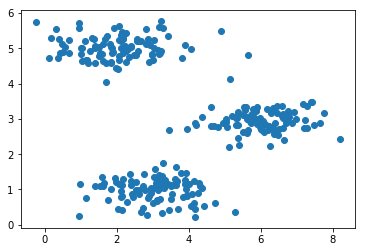

In [25]:
plt.scatter(x, y)

In [3]:
K = 3; # 3 Centroids
initial_centroids = [[3,3], [6,2], [8,5]];

In [4]:
initial_centroids = np.asarray(initial_centroids)

In [33]:
#K1  = (np.asarray(initial_centroids).shape)[0]
K1 = len(initial_centroids) 
K1
idx = np.zeros([K1, 1])
idx.shape

(3, 1)

In [35]:
print(type(mat['X']))
print((mat['X'].shape)[0])

<class 'numpy.ndarray'>
300


In [63]:
dist = np.zeros([(initial_centroids.shape)[0], 1])
print(dist.shape)
dist

(3, 1)


array([[0.],
       [0.],
       [0.]])

In [82]:
print(X[0, :])
print()
print(initial_centroids)

for j in range(3):
    dist[j, :] = np.sqrt(np.sum((np.square(X[1, :] - initial_centroids[j, :])), axis=0))
    
print()
print(dist)

print()
dmin, didx = np.min(dist), np.argmin(dist)
print(dmin, didx)

[1.84207953 4.6075716 ]

[[3 3]
 [6 2]
 [8 5]]

[[3.21059727]
 [2.82070278]
 [2.34994625]]

2.3499462509952416 2


In [99]:
m, n = X.shape
print(m, '--', n)

300 -- 2


In [21]:
def findClosestCentroids(X, centroids):
    
    """
    Input
        X: It is a 2D matrix [x co-ordinate, y co-ordinate]   numpy.ndarray
        centroids: Initital centroids 2D matrix [[x1, y1], [x2, y2] ..... [xn, yn]] numpy.ndarray
        
    Output
        idx: return a array in which each pixel have it's associated closest centroid. size([no of pixels,1])  numpy.ndarray
    """
    
    K = (centroids.shape)[0]
    #K = len(centroids)    K = 3
    
    # idx of size (300, 1)
    idx = np.zeros([(X.shape)[0], 1])
    
    #print(K)
    
    for i in range((X.shape)[0]):
        #print('running')
        dist = np.zeros([(centroids.shape)[0], 1])
        for j in range(K):
            dist[j, :] = np.sqrt(np.sum((np.square(X[i, :] - centroids[j, :])), axis=0))
        d_min, d_idx = np.min(dist), np.argmin(dist)
        idx[i] = d_idx
        #print(dist, d_idx)
        
    return idx


def computeCentroids(X, idx, K):
    
    """
    This function will return new centroids by computing mean of the data points assigned to each data point.
    Input
        X:   np.ndarray 2D size([300, 2])
        idx: closest centroid to the pixel size([300, 1])
        K:   no of centroids 3  
    Output
        centroids: new values of centroids 
    """
    
    m, n = X.shape
    centroids = np.zeros([K, n])
    
    for i in range(K):
        c_i = np.zeros(idx.shape)
        c_i[idx == i] = 1
        n_i = np.sum(c_i)
        c_i_matrix = np.matlib.repmat(c_i, 1, n)
        X_c_i = np.multiply(X, c_i_matrix)
        centroids[i, :] = np.sum(X_c_i, axis = 0)/np.sum(c_i)
    
    return centroids


def runKMeans(X, initial_centroids, max_iter):
    """
    K Means algorithm
    Input
        X: numpy.ndarray co-ordinates
        initial_centroids: numpy.ndarray initial centroids, random 
        max_iter: integer value represents the number of iterations.
    Output
        centroids: numpy.ndarray final centroids 
        idx: numpy.ndarray labels/index for each pixel
    """
    
    m, n = X.shape;
    K = (initial_centroids.shape)[0]
    centroids = initial_centroids;
    previous_centroids = centroids;
    idx = np.zeros([m, 1]);
    
    for i in range(max_iter):
        print("K Means iteration {0:d}/{1:d}  ".format(i+1, max_iter) )
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
        #print('centroids \n', centroids)
    return centroids, idx


def KMeansInitCentroids(X, K):
    
    centroids = np.zeros([K, (X.shape)[1]])
    random_idx = np.random.randint(1, row*col, [row*col, 1])
    centroids = X[random_idx[:K, 0], :]
    
    return centroids

In [8]:
# Testing
"""idx = findClosestCentroids(X, initial_centroids)
idx[:3]

centroids = computeCentroids(X, idx, K)
centroids"""

centroids, idx = runKMeans(X, initial_centroids, 10)

K Means iteration 1/10  
centroids 
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
K Means iteration 2/10  
centroids 
 [[2.31325526 3.22830617]
 [5.33273768 2.43159599]
 [6.8653618  3.23293995]]
K Means iteration 3/10  
centroids 
 [[2.19692479 3.42136707]
 [4.83555397 2.12976745]
 [6.6560054  3.0751355 ]]
K Means iteration 4/10  
centroids 
 [[1.98241171 4.0250785 ]
 [3.91150763 1.47060546]
 [6.34008592 3.05366642]]
K Means iteration 5/10  
centroids 
 [[1.95399466 5.02557006]
 [3.12663743 1.1121712 ]
 [6.12919526 3.01606258]]
K Means iteration 6/10  
centroids 
 [[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]
K Means iteration 7/10  
centroids 
 [[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]
K Means iteration 8/10  
centroids 
 [[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]
K Means iteration 9/10  
centroids 
 [[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366

In [149]:
print(centroids)

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


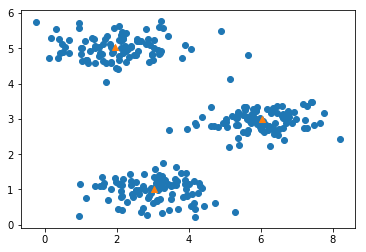

In [10]:
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^')

In [105]:
c_i = np.zeros(idx.shape)
c_i[idx == 0] = 1
np.sum(c_i)

191.0

In [107]:
c_i_matrix = np.matlib.repmat(c_i, 1, n)

In [110]:
X_c_i = np.multiply(X, c_i_matrix)

In [116]:
a , b = np.sum(X_c_i, axis = 0)/np.sum(c_i)

In [123]:
print("{0:f}, {1:f}" .format(a, b))

2.428301, 3.157924


(300, 2) (300, 1)


#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Image Compression using KMeans

In [60]:
def kmeans_test(img, K, max_iters):
    #img = img/255
    row, col, ch = img.shape

    X = np.reshape(img, [row*col, ch])

    #K = 5
    #max_iters = 10

    initial_centroids = KMeansInitCentroids(X, K)
    [centroids, idx] = runKMeans(X, initial_centroids, max_iters);
    idx = findClosestCentroids(X, centroids)

    Xcompressed = np.zeros([row*col, ch])

    for i in range(row*col):
        Xcompressed[i, :] = centroids[int(idx[i][0]),:]

    Xcompressed = np.reshape(Xcompressed, [row, col, ch])


    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(Xcompressed)
    plt.title('Compressed Image')

K Means iteration 1/10  
K Means iteration 2/10  
K Means iteration 3/10  
K Means iteration 4/10  
K Means iteration 5/10  
K Means iteration 6/10  
K Means iteration 7/10  
K Means iteration 8/10  
K Means iteration 9/10  
K Means iteration 10/10  


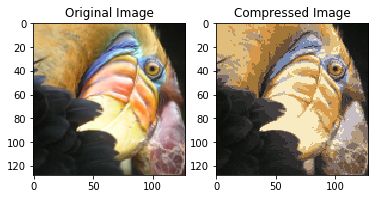

In [53]:
img = plt.imread('E:\\SPML\\Machine_Learning_Coursera\\machine-learning-ex7\\ex7\\bird_small.png')
kmeans_test(img)

K Means iteration 1/5  
K Means iteration 2/5  
K Means iteration 3/5  
K Means iteration 4/5  
K Means iteration 5/5  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time required:  -250.02298665046692


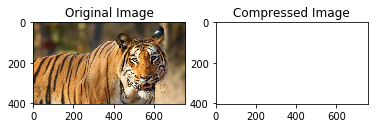

In [61]:
img2 = plt.imread("E:\\SPML\\EC761-IPC\\project\\codes\\Tiger.jpg")
t = time.time()
kmeans_test(img2, K=5, max_iters=5)
print("Time required: ", (t-time.time()))